In [54]:
# pip install tensorflow_decision_forests 

In [55]:
import tensorflow as tf
import tensorflow_decision_forests as tfdf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Comment this if the data visualisations doesn't work on your side
%matplotlib inline

In [56]:
print("TensorFlow v" + tf.__version__)
print("TensorFlow Decision Forests v" + tfdf.__version__)

TensorFlow v2.19.0
TensorFlow Decision Forests v1.12.0


In [57]:
train_file_path = "../data/train.csv"
dataset_df = pd.read_csv(train_file_path)
print("Full train dataset shape is {}".format(dataset_df.shape))

Full train dataset shape is (1460, 81)


In [58]:
dataset_df.head(3)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


In [59]:
dataset_df = dataset_df.drop('Id', axis=1)

In [60]:
dataset_df.head(20)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [61]:
dataset_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


/tmp/ipykernel_41308/3430012634.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset_df['SalePrice'], color='g', bins=100, hist_kws={'alpha': 0.4});


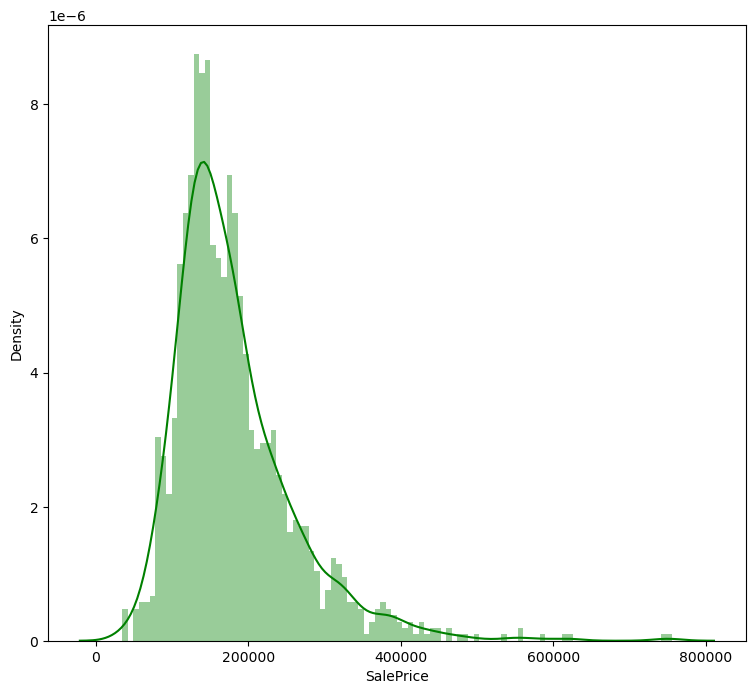

In [62]:
print(dataset_df['SalePrice'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(dataset_df['SalePrice'], color='g', bins=100, hist_kws={'alpha': 0.4});

/tmp/ipykernel_41308/269934859.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset_df['SalePrice'].apply(lambda x: np.log(x)), color='g', bins=100, hist_kws={'alpha': 0.4});


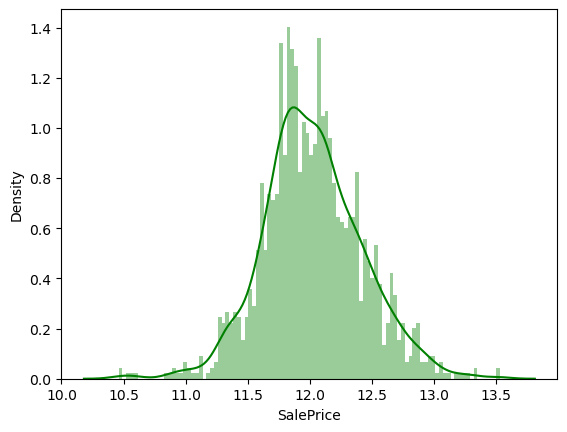

In [63]:
sns.distplot(dataset_df['SalePrice'].apply(lambda x: np.log(x)), color='g', bins=100, hist_kws={'alpha': 0.4});

In [64]:
dataset_df['MSSubClass'] = dataset_df['MSSubClass'].astype(str)
dataset_df['OverallQual'] = dataset_df['OverallQual'].astype(str)
dataset_df['OverallCond'] = dataset_df['OverallCond'].astype(str)
# dataset_df['YearBuilt'] = dataset_df['YearBuilt'].astype(str)
# dataset_df['YearRemodAdd'] = dataset_df['YearRemodAdd'].astype(str)
dataset_df['BsmtFullBath'] = dataset_df['BsmtFullBath'].astype(str)
dataset_df['BsmtHalfBath'] = dataset_df['BsmtHalfBath'].astype(str)
dataset_df['FullBath'] = dataset_df['FullBath'].astype(str)
dataset_df['HalfBath'] = dataset_df['HalfBath'].astype(str)
dataset_df['BedroomAbvGr'] = dataset_df['BedroomAbvGr'].astype(str)
dataset_df['KitchenAbvGr'] = dataset_df['KitchenAbvGr'].astype(str)
dataset_df['TotRmsAbvGrd'] = dataset_df['TotRmsAbvGrd'].astype(str)
dataset_df['Fireplaces'] = dataset_df['KitchenAbvGr'].astype(str)
# dataset_df['GarageYrBlt'] = dataset_df['GarageYrBlt'].astype(str)
dataset_df['GarageCars'] = dataset_df['GarageCars'].astype(str)
# dataset_df['MoSold'] = dataset_df['MoSold'].astype(str)
# dataset_df['YrSold'] = dataset_df['YrSold'].astype(str)

In [65]:
list(set(dataset_df.dtypes.tolist()))


[dtype('int64'), dtype('float64'), dtype('O')]

In [66]:
df_num = dataset_df.select_dtypes(include = ['float64', 'int64'])
df_num.head()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,65.0,8450,2003,2003,196.0,706,0,150,856,856,...,0,61,0,0,0,0,0,2,2008,208500
1,80.0,9600,1976,1976,0.0,978,0,284,1262,1262,...,298,0,0,0,0,0,0,5,2007,181500
2,68.0,11250,2001,2002,162.0,486,0,434,920,920,...,0,42,0,0,0,0,0,9,2008,223500
3,60.0,9550,1915,1970,0.0,216,0,540,756,961,...,0,35,272,0,0,0,0,2,2006,140000
4,84.0,14260,2000,2000,350.0,655,0,490,1145,1145,...,192,84,0,0,0,0,0,12,2008,250000


In [67]:
df_num.isna().sum()

LotFrontage      259
LotArea            0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         8
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
GarageYrBlt       81
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
SalePrice          0
dtype: int64

<Axes: >

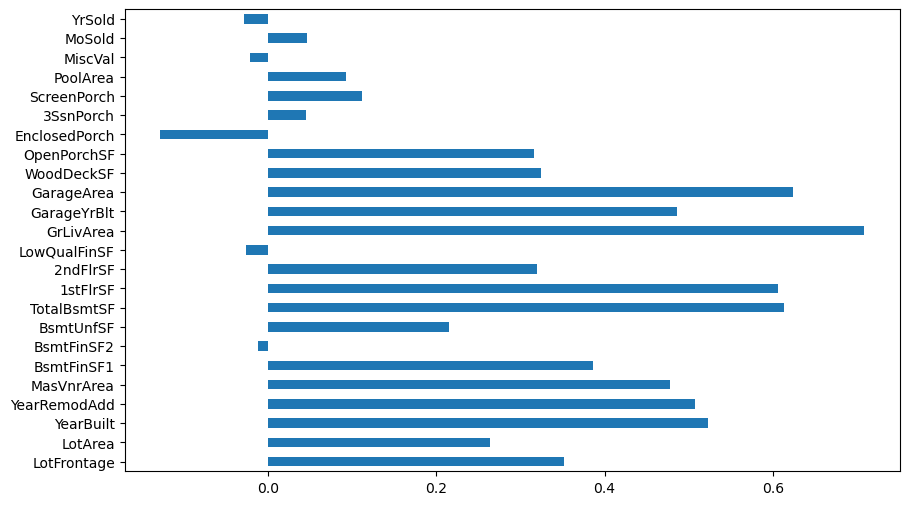

In [68]:
correlation_values = df_num.corr()["SalePrice"].drop("SalePrice")
correlation_values.plot(kind='barh', figsize=(10, 6))

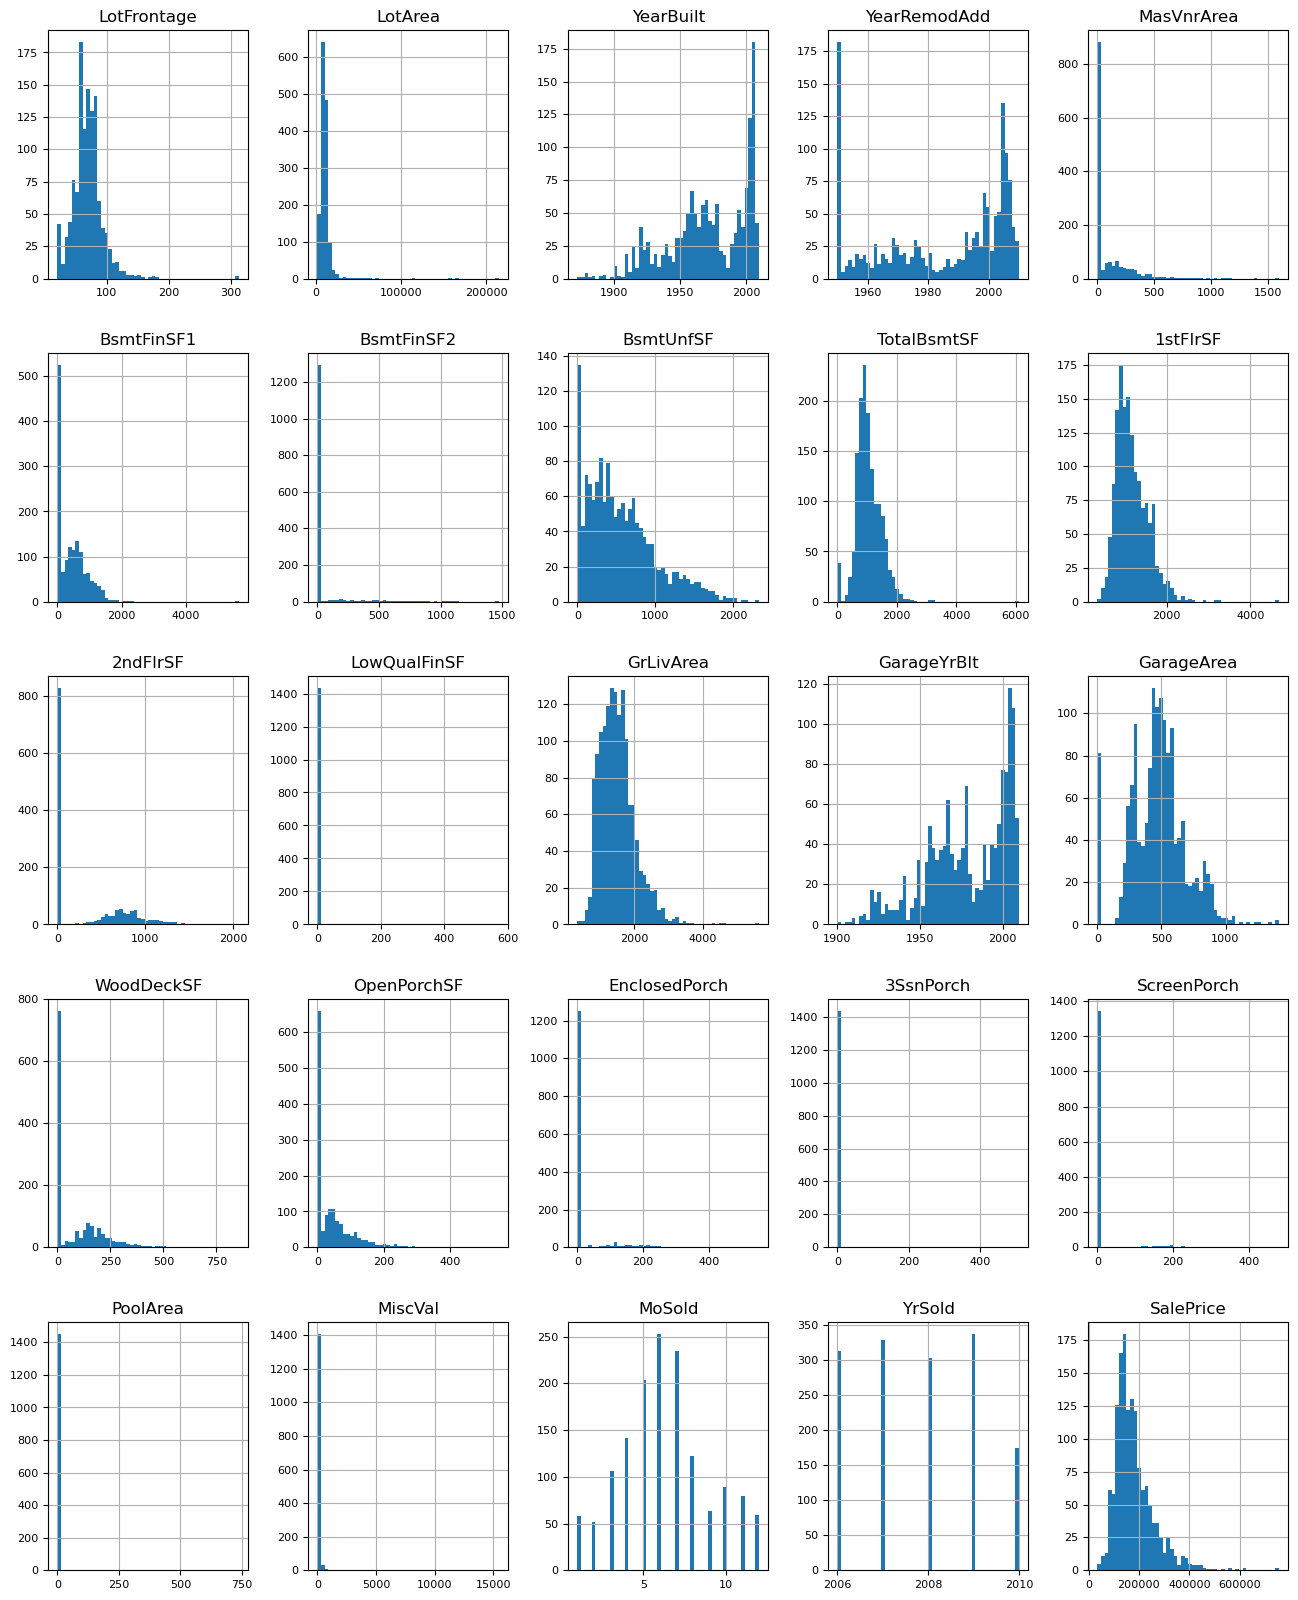

In [69]:
df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);


In [70]:
# dataset_df[['3SsnPorch']][dataset_df['3SsnPorch']>10].value_counts().sum()

In [71]:
# sns.violinplot(dataset_df[['3SsnPorch']])

In [72]:
dataset_df = dataset_df.dropna(subset=['GarageYrBlt', 'GarageFinish', 'MasVnrArea', 'SalePrice'], how='any')
dataset_df['LotFrontage'] = dataset_df['LotFrontage'].fillna(dataset_df['LotFrontage'].median())
print("NaN values remaining:", dataset_df.isnull().sum().sum())

NaN values remaining: 6636


In [73]:
print(dataset_df.isnull().sum()[dataset_df.isnull().sum() > 0])

Alley           1290
MasVnrType       789
BsmtQual          30
BsmtCond          30
BsmtExposure      31
BsmtFinType1      30
BsmtFinType2      31
Electrical         1
FireplaceQu      614
PoolQC          1364
Fence           1106
MiscFeature     1320
dtype: int64


In [74]:
dataset_df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [75]:
# df_num = dataset_df.select_dtypes(include = ['float64', 'int64'])

In [76]:
# df_num = df_num[df_num['GarageYrBlt'].isna()==0]
# df_num = df_num[df_num['MasVnrArea'].isna()==0]
# # df_num

In [77]:
# df_num['LotFrontage'] = df_num['LotFrontage'].fillna(df_num['LotFrontage'].median())
# # df_num.isna().sum()

In [78]:
# print("NaN values remaining:", df_num.isna().sum().sum())

In [79]:
dataset_df = dataset_df.drop(columns=['Alley', 'MasVnrType', 'FireplaceQu','PoolQC','Fence','MiscFeature','MiscVal','LowQualFinSF','BsmtFinSF2','BsmtFinType2'])

In [80]:
dataset_df['BsmtQual'] = dataset_df['BsmtQual'].replace(np.nan, dataset_df['BsmtQual'].value_counts().idxmax())
dataset_df['BsmtCond'] = dataset_df['BsmtCond'].replace(np.nan, dataset_df['BsmtCond'].value_counts().idxmax())
dataset_df['BsmtExposure'] = dataset_df['BsmtExposure'].replace(np.nan, dataset_df['BsmtExposure'].value_counts().idxmax())
dataset_df['BsmtFinType1'] = dataset_df['BsmtFinType1'].replace(np.nan, dataset_df['BsmtFinType1'].value_counts().idxmax())
# dataset_df['BsmtFinType2'] = dataset_df['BsmtFinType2'].replace(np.nan, dataset_df['BsmtFinType2'].value_counts().idxmax())
dataset_df['Electrical'] = dataset_df['Electrical'].replace(np.nan, dataset_df['Electrical'].value_counts().idxmax())

In [81]:
dataset_df["HouseAgeAtSale"] = dataset_df["YrSold"].astype(float) - dataset_df["YearBuilt"].astype(float)

In [82]:
dataset_df["GarageAgeAtSale"] = dataset_df["YrSold"].astype(float) - dataset_df["GarageYrBlt"].astype(float)

In [83]:
dataset_df = dataset_df.drop(columns=["YrSold"], errors="ignore")
dataset_df.head(10)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MoSold,SaleType,SaleCondition,SalePrice,HouseAgeAtSale,GarageAgeAtSale
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,2,WD,Normal,208500,5.0,5.0
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,5,WD,Normal,181500,31.0,31.0
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,9,WD,Normal,223500,7.0,7.0
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,2,WD,Abnorml,140000,91.0,8.0
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,12,WD,Normal,250000,8.0,8.0
5,50,RL,85.0,14115,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,320,0,0,10,WD,Normal,143000,16.0,16.0
6,20,RL,75.0,10084,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,8,WD,Normal,307000,3.0,3.0
7,60,RL,70.0,10382,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,228,0,0,0,11,WD,Normal,200000,36.0,36.0
8,50,RM,51.0,6120,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,205,0,0,0,4,WD,Abnorml,129900,77.0,77.0
9,190,RL,50.0,7420,Pave,Reg,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,1,WD,Normal,118000,69.0,69.0


In [84]:
# dataset_df.select_dtypes(include = ['O']).isna().sum()

In [85]:
print("NaN values remaining:", dataset_df.isnull().sum().sum())

NaN values remaining: 0


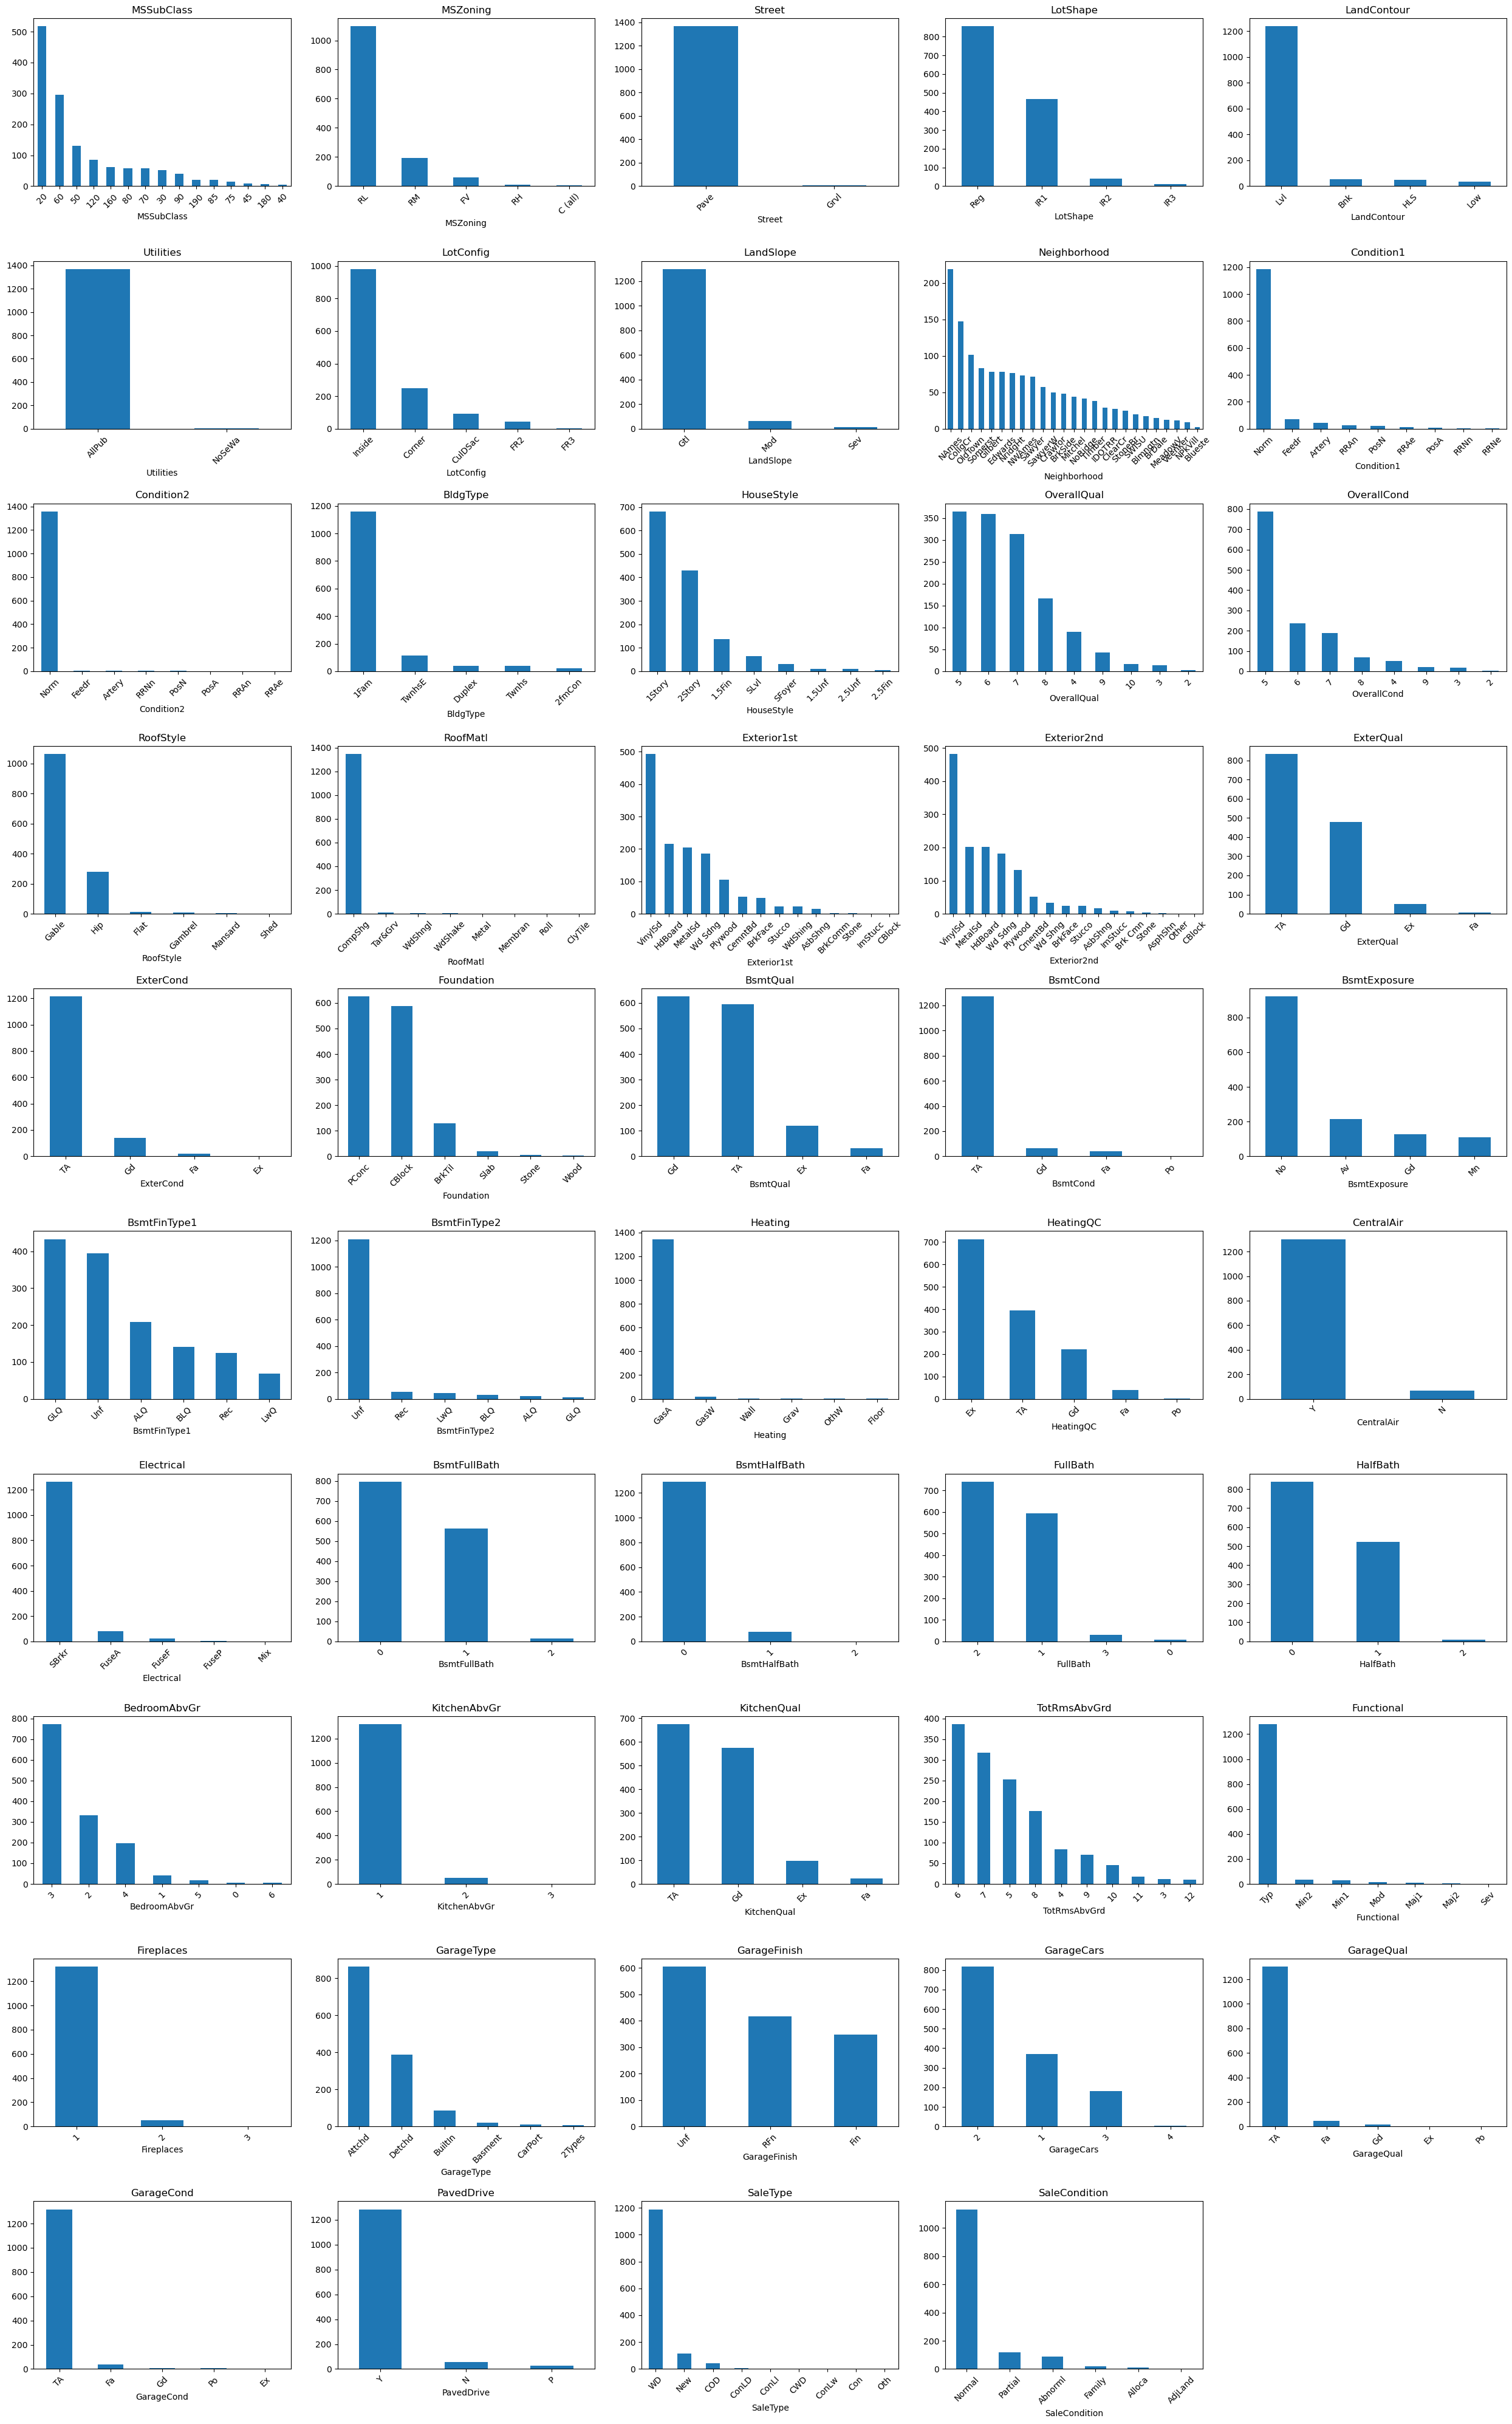

In [86]:
# dataset_df.select_dtypes(include = ['O']).plot.box(figsize=(16, 20));
cat_cols = dataset_df.select_dtypes(include=['object']).columns

# Déterminer la taille de la figure
n_cols = 5  # nombre de colonnes de subplots
n_rows = (len(cat_cols) + n_cols - 1) // n_cols  # nombre de lignes nécessaires

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols*5, n_rows*4))
axes = axes.flatten()  # pour accéder facilement à chaque subplot

for i, col in enumerate(cat_cols):
    dataset_df[col].value_counts().plot(kind='bar', ax=axes[i], title=col)
    axes[i].tick_params(axis='x', rotation=45)

# Supprimer les axes vides si cat_cols n'est pas multiple de n_cols
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [87]:
# import numpy as np

# def split_dataset(dataset, test_ratio=0.30):
#   test_indices = np.random.rand(len(dataset)) < test_ratio
#   return dataset[~test_indices], dataset[test_indices]

# train_ds_pd, valid_ds_pd = split_dataset(dataset_df)
# print("{} examples in training, {} examples in testing.".format(
#     len(train_ds_pd), len(valid_ds_pd)))

932 examples in training, 439 examples in testing.


In [ ]:
dataset_df_rand = dataset_df.sample(frac=1, random_state=42).reset_index(drop=True)
n_splits = 5
rmse_scores = []
label = 'SalePrice'

# Préparer les subplots (1 ligne, n_splits colonnes)
fig, axes = plt.subplots(1, n_splits, figsize=(5 * n_splits, 4))

fold_size = len(dataset_df_rand) // n_splits

for i in range(n_splits):
    # Définir indices du fold
    test_start = i * fold_size
    test_end = (i + 1) * fold_size if i != n_splits - 1 else len(dataset_df_rand)

    df_test = dataset_df_rand.iloc[test_start:test_end]
    df_train = pd.concat([dataset_df_rand.iloc[:test_start], dataset_df_rand.iloc[test_end:]])

    # Convertir en tf.data.Dataset
    train_ds = tfdf.keras.pd_dataframe_to_tf_dataset(df_train, label=label, task=tfdf.keras.Task.REGRESSION)
    test_ds = tfdf.keras.pd_dataframe_to_tf_dataset(df_test, label=label, task=tfdf.keras.Task.REGRESSION)

    # Créer et entraîner le modèle
    model = tfdf.keras.RandomForestModel(hyperparameter_template="benchmark_rank1", task=tfdf.keras.Task.REGRESSION, random_seed=42)
    model.fit(train_ds)

    inspector = model.make_inspector()
    rmse = inspector.evaluation().rmse
    rmse_scores.append(rmse)
    print(f"Fold {i+1} RMSE: {rmse:.2f}")

    # Extraire les logs et tracer dans un subplot
    logs = model.make_inspector().training_logs()
    axes[i].plot([log.num_trees for log in logs], [log.evaluation.rmse for log in logs])
    axes[i].set_title(f"Fold {i+1}")
    axes[i].set_xlabel("Number of trees")
    axes[i].set_ylabel("RMSE (out-of-bag)")

plt.tight_layout()
plt.show()

print("RMSE moyen sur les 5 folds :", np.mean(rmse_scores))

In [ ]:
# label = 'SalePrice'
# train_ds = tfdf.keras.pd_dataframe_to_tf_dataset(train_ds_pd, label=label, task = tfdf.keras.Task.REGRESSION)
# valid_ds = tfdf.keras.pd_dataframe_to_tf_dataset(valid_ds_pd, label=label, task = tfdf.keras.Task.REGRESSION)

In [ ]:
# tfdf.keras.get_all_models()

In [ ]:
# rf = tfdf.keras.RandomForestModel(hyperparameter_template="benchmark_rank1", task=tfdf.keras.Task.REGRESSION)
# rf.compile(metrics=["mse"])

In [ ]:
# rf.fit(x=train_ds)

In [ ]:
# from IPython.display import HTML, display
# import tensorflow_decision_forests as tfdf

# # rf is your trained model
# html = tfdf.model_plotter.plot_model(rf, tree_idx=0, max_depth=4)
# display(HTML(html))

In [ ]:
# import matplotlib.pyplot as plt
# logs = rf.make_inspector().training_logs()
# plt.plot([log.num_trees for log in logs], [log.evaluation.rmse for log in logs])
# plt.xlabel("Number of trees")
# plt.ylabel("RMSE (out-of-bag)")
# plt.show()

In [ ]:
# inspector = rf.make_inspector()
# inspector.evaluation()

In [ ]:
# inspector.features()

In [ ]:
# evaluation = rf.evaluate(x=valid_ds,return_dict=True)

# for name, value in evaluation.items():
#   print(f"{name}: {value:.4f}")

In [95]:
# print(f"Available variable importances:")
# for importance in inspector.variable_importances().keys():
#   print("\t", importance)

In [96]:
inspector.variable_importances()["NUM_AS_ROOT"]


[("OverallQual" (4; #56), 83.0),
 ("GrLivArea" (1; #35), 63.0),
 ("GarageArea" (1; #28), 43.0),
 ("HouseAgeAtSale" (1; #39), 42.0),
 ("YearBuilt" (1; #69), 41.0),
 ("ExterQual" (4; #20), 37.0),
 ("1stFlrSF" (1; #0), 31.0),
 ("TotalBsmtSF" (1; #66), 28.0),
 ("GarageAgeAtSale" (1; #27), 25.0),
 ("GarageCars" (4; #29), 21.0),
 ("GarageYrBlt" (1; #34), 17.0),
 ("YearRemodAdd" (1; #70), 14.0),
 ("LotArea" (1; #45), 13.0),
 ("LotFrontage" (1; #47), 13.0),
 ("3SsnPorch" (1; #2), 12.0),
 ("BsmtFinSF1" (1; #7), 12.0),
 ("MasVnrArea" (1; #51), 12.0),
 ("PoolArea" (1; #58), 10.0),
 ("EnclosedPorch" (1; #18), 5.0),
 ("2ndFlrSF" (1; #1), 4.0),
 ("OpenPorchSF" (1; #54), 3.0),
 ("ScreenPorch" (1; #63), 3.0),
 ("BsmtQual" (4; #12), 2.0),
 ("KitchenQual" (4; #42), 2.0),
 ("WoodDeckSF" (1; #68), 2.0)]

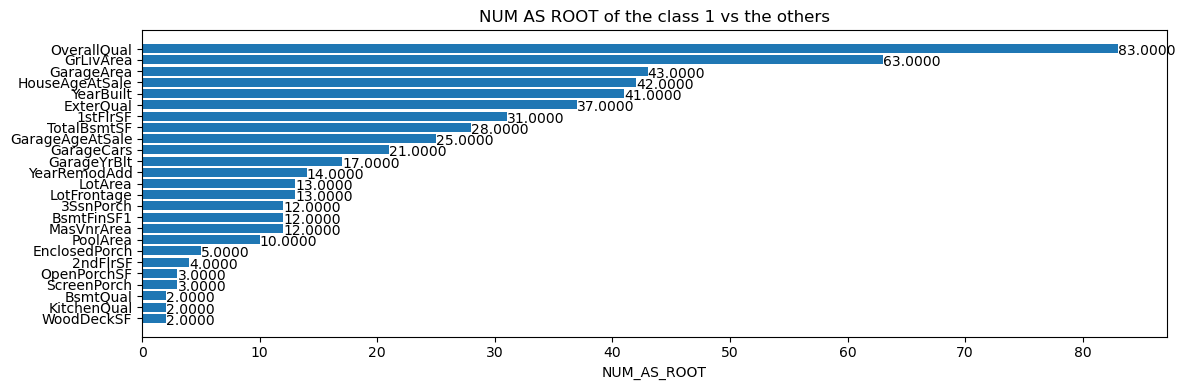

In [97]:
plt.figure(figsize=(12, 4))

# Mean decrease in AUC of the class 1 vs the others.
variable_importance_metric = "NUM_AS_ROOT"
variable_importances = inspector.variable_importances()[variable_importance_metric]

# Extract the feature name and importance values.
#
# `variable_importances` is a list of <feature, importance> tuples.
feature_names = [vi[0].name for vi in variable_importances]
feature_importances = [vi[1] for vi in variable_importances]
# The feature are ordered in decreasing importance value.
feature_ranks = range(len(feature_names))

bar = plt.barh(feature_ranks, feature_importances, label=[str(x) for x in feature_ranks])
plt.yticks(feature_ranks, feature_names)
plt.gca().invert_yaxis()

# TODO: Replace with "plt.bar_label()" when available.
# Label each bar with values
for importance, patch in zip(feature_importances, bar.patches):
  plt.text(patch.get_x() + patch.get_width(), patch.get_y(), f"{importance:.4f}", va="top")

plt.xlabel(variable_importance_metric)
plt.title("NUM AS ROOT of the class 1 vs the others")
plt.tight_layout()
plt.show()

In [98]:
test_file_path = "../data/test.csv"
test_data = pd.read_csv(test_file_path)
ids = test_data.pop('Id')

test_data["HouseAgeAtSale"] = test_data["YrSold"].astype(float) - test_data["YearBuilt"].astype(float)
test_data["GarageAgeAtSale"] = test_data["YrSold"].astype(float) - test_data["GarageYrBlt"].astype(float)
test_data = test_data.drop(columns=["YrSold"], errors="ignore")

test_ds = tfdf.keras.pd_dataframe_to_tf_dataset(
    test_data,
    task = tfdf.keras.Task.REGRESSION)

preds = rf.predict(test_ds)
output = pd.DataFrame({'Id': ids,
                       'SalePrice': preds.squeeze()})

output.head()

2/2 [==============================] - 0s 25ms/step


,Id,SalePrice
0,1461,134850.500000
1,1462,168373.921875
2,1463,188053.843750
3,1464,190710.187500
4,1465,218745.312500


In [99]:
sample_submission_df = pd.read_csv('../data/sample_submission.csv')
sample_submission_df['SalePrice'] = rf.predict(test_ds)
sample_submission_df.to_csv('../submissions/submission5_years_back_to_num_and_crossValidation.csv', index=False)
sample_submission_df.head()

2/2 [==============================] - 0s 26ms/step


,Id,SalePrice
0,1461,134850.500000
1,1462,168373.921875
2,1463,188053.843750
3,1464,190710.187500
4,1465,218745.312500


In [ ]:
# kaggle competitions submit -c house-prices-advanced-regression-techniques -f work/submissions/submission.csv -m "First try"